In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
from scipy.interpolate import interp1d
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')
#plt.rc('xtick', labelsize=16) 
#plt.rc('ytick', labelsize=16) 

In [32]:
models = ['tca_standard','tca_early','tca_earlier','tca_earliest','tca_earliest2','tca_earliest3']

k = 0.1

cosmo={}
for M in models:
    cosmo[M] = Class()
    cosmo[M].set({'gauge':'synchronous',
                  'output':'tCl, lCl',
                  'omega_cdm':0.12038,
                  'k_output_values':k,
                  #'z_reio':11.357,
                  #'reionization_z_start_max':750,
                  #'z_reiomod_start':300,
                  #'recfast_Nz0':80000,
                  #'recfast_z_initial':1e7,
                  'recombination':'recfast',
                  #'recfast_H_frac':3e-4,
                  #'reio_parametrization':'reio_none',
                  #'100*theta_s':1.042143,
                  #'100*theta_s':1.02,
                  #'background_verbose':5,
                  #'input_verbose':5,
                  'tight_coupling_approximation':0,
                  'h':0.67556,
                  'lensing':'yes',
                  'a_bidm':5e-4,
                  'f_bidm':0.99,
                  'A_bidm':3e-5,
                  'm_bidm':100,
                  'epsilon_bidm':3e-11,
                  #'n_bidm':-4,
                  'bidm_type':'resonance'
                 })
    if M == 'tca_early':
        cosmo[M].set({'tight_coupling_trigger_tau_c_over_tau_h':0.01,#0.012,
                      'tight_coupling_trigger_tau_c_over_tau_k':0.002,#0.008,
                     })
    if M == 'tca_earlier':
        cosmo[M].set({'tight_coupling_trigger_tau_c_over_tau_h':0.008,#0.01,
                      'tight_coupling_trigger_tau_c_over_tau_k':0.001,#0.005,
                     })
    if M == 'tca_earliest':
        cosmo[M].set({'tight_coupling_trigger_tau_c_over_tau_h':0.004,#0.05,
                      'tight_coupling_trigger_tau_c_over_tau_k':0.0005,#0.002,
                     })
    if M == 'tca_earliest2':
        cosmo[M].set({'tight_coupling_trigger_tau_c_over_tau_h':0.002,#0.05,
                      'tight_coupling_trigger_tau_c_over_tau_k':0.0003,#0.002,
                     })
    if M == 'tca_earliest2':
        cosmo[M].set({'tight_coupling_trigger_tau_c_over_tau_h':0.001,#0.05,
                      'tight_coupling_trigger_tau_c_over_tau_k':0.00025,#0.002,
                     })
    #if M == 'tca_standard':
    #    cosmo[M].set({#'tight_coupling_trigger_tau_c_over_tau_h':0.01,
    #                  #'tight_coupling_trigger_tau_c_over_tau_k':0.005,
    #                 })
    print([M])
    cosmo[M].compute()

['tca_standard']
['tca_early']
['tca_earlier']
['tca_earliest']
['tca_earliest2']


CosmoComputationError: 

Error in Class: perturb_init(L:396) :error in perturb_solve(ppr, pba, pth, ppt, index_md, index_ic, index_k, pppw[thread]);
=>perturb_solve(L:2437) :error in perturb_vector_init(ppr, pba, pth, ppt, index_md, index_ic, k, interval_limit[index_interval], ppw, previous_approx);
=>perturb_vector_init(L:3442) :condition (ppw->approx[ppw->index_ap_tca] == (int)tca_off) is true; scalar initial conditions assume tight-coupling approximation turned on

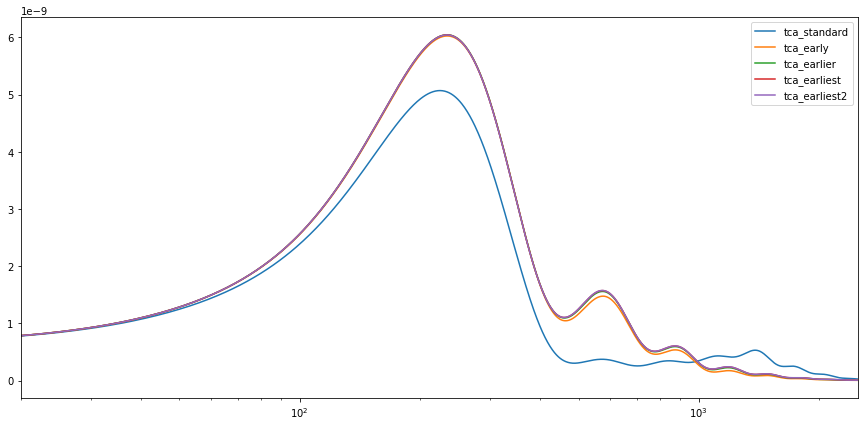

In [24]:
fig = plt.figure(1, figsize = (15,7))
ax = fig.add_subplot(111)
for M in models:
    cl = cosmo[M].lensed_cl(2500)
    l = cl['ell']
    TT = cl['tt']
    ax.semilogx(l,(l*(l+1))*TT, label=M)
ax.set_xlim(20,2.5e3)
ax.legend()

/home/markus/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


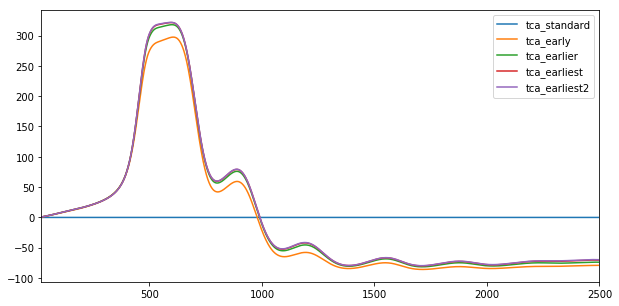

In [25]:
fig = plt.figure(1, figsize = (10,5))
ax = fig.add_subplot(111)
clref = cosmo['tca_standard'].lensed_cl(2500)
TTref = clref['tt']
for M in models:
    cl = cosmo[M].lensed_cl(2500)
    l = cl['ell']
    TT = cl['tt']
    ax.plot(l,100*(TT-TTref)/TTref, label=M)
ax.set_xlim(20,2.5e3)
ax.legend()

In [26]:
all_k ={}
one_k ={}
for M in models:
    all_k[M] = cosmo[M].get_perturbations()
    one_k[M] = all_k[M]['scalar'][0] 

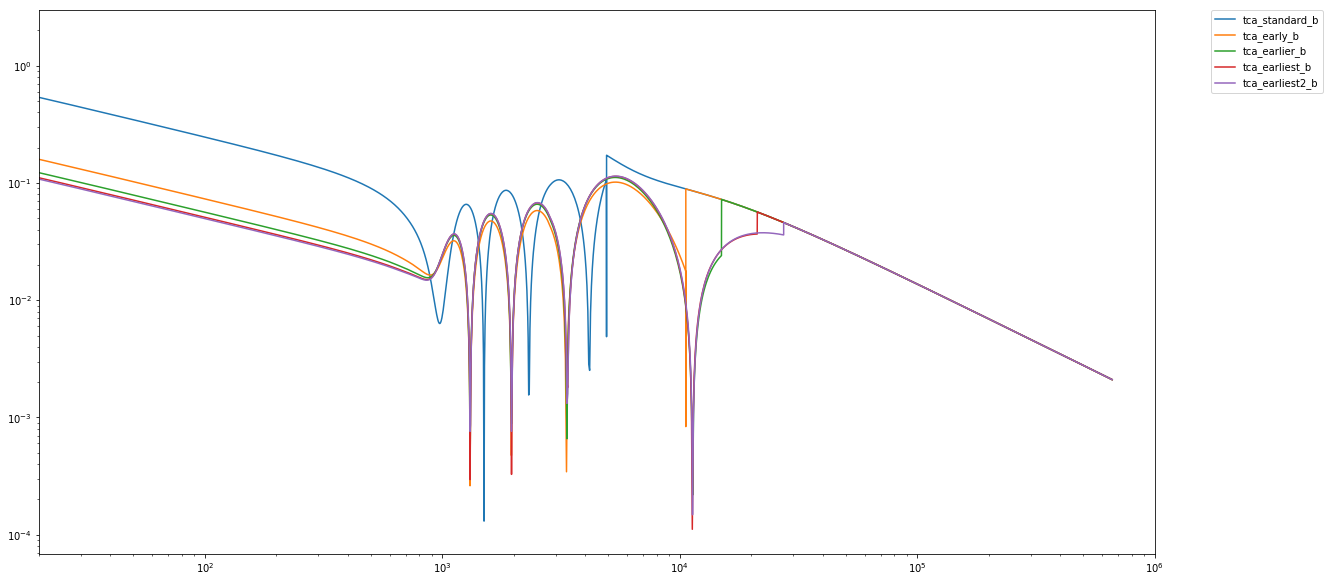

In [28]:
plt.figure(figsize = (20,10))
for M in models:
    tau = one_k[M]['tau [Mpc]']
    a = one_k[M]['a']
    z = 1/a -1
    theta_b = abs(one_k[M]['theta_b'])
    #theta_g = abs(one_k[M]['theta_g'])
    plt.loglog(z,theta_b,label=M + '_b')
    #plt.loglog(a,theta_g,label=M + '_g')
    #if M != 'ref':
    #    theta_idm = abs(one_k[M]['theta_bidm'])
    #    plt.loglog(z,theta_idm,label=M + '_idm')
plt.xlim([20,1e6])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

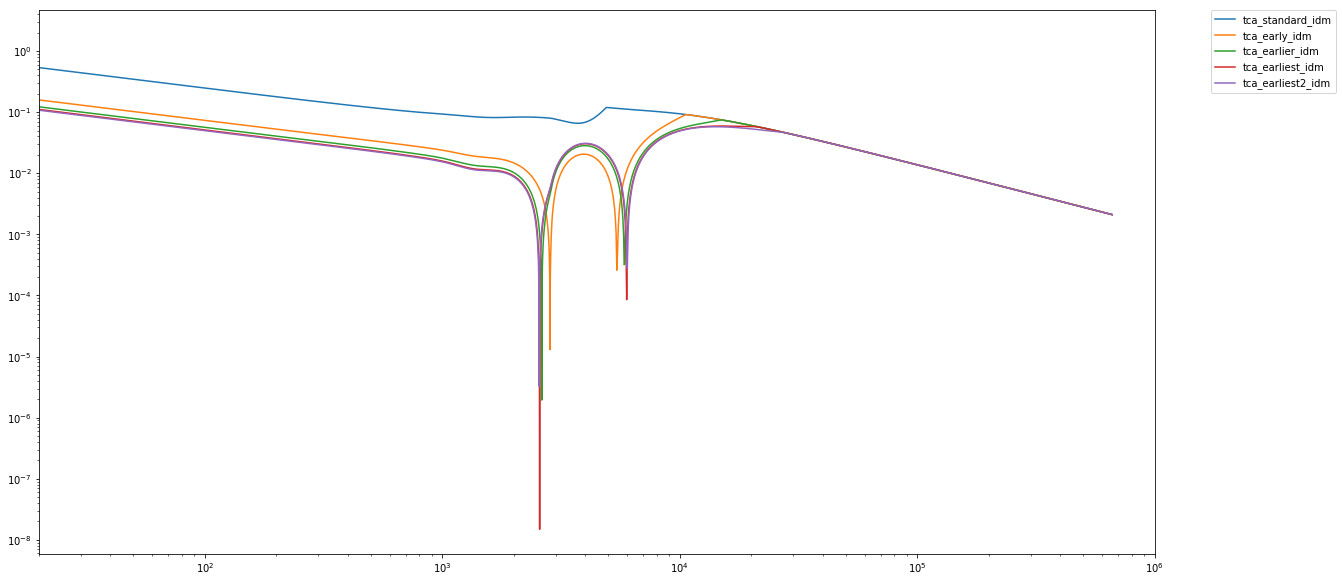

In [29]:
plt.figure(figsize = (20,10))
for M in models:
    tau = one_k[M]['tau [Mpc]']
    a = one_k[M]['a']
    z = 1/a -1
    #theta_b = abs(one_k[M]['theta_b'])
    #theta_g = abs(one_k[M]['theta_g'])
    #plt.loglog(z,theta_b,label=M + '_b')
    #plt.loglog(a,theta_g,label=M + '_g')
    #if M != 'ref':
    theta_idm = abs(one_k[M]['theta_bidm'])
    plt.loglog(z,theta_idm,label=M + '_idm')
plt.xlim([20,1e6])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)